In [1]:
import pandas as pd

results = pd.ExcelFile('Classical ML Results with Metrics.xlsx')

result_df = pd.read_excel('Classical ML Results with Metrics.xlsx', sheet_name=results.sheet_names[-1])

result_df

,Dataset,Model,Satellite,MAE,MSE,RMSE,MAPE,R2
0,VV+VH+Angle,RandomForest,Sentinel,9.2352,123.7550,11.1245,0.5389,-0.1242
1,VV+VH+Angle,XGBoost,Sentinel,9.1628,121.7976,11.0362,0.5356,-0.1064
2,VV+VH+Angle,AdaBoost,Sentinel,9.0031,117.0807,10.8204,0.5291,-0.0636
3,VV+VH+Angle,SVR,Sentinel,8.9616,121.1355,11.0062,0.5388,-0.1004
4,VV+VH,RandomForest,Sentinel,9.1231,125.1777,11.1883,0.5406,-0.1371
5,VV+VH,XGBoost,Sentinel,8.9135,118.5152,10.8865,0.5340,-0.0766
6,VV+VH,AdaBoost,Sentinel,9.2057,126.8385,11.2623,0.5391,-0.1522
7,VV+VH,SVR,Sentinel,8.8044,114.3896,10.6953,0.5294,-0.0391
8,VV+VH+Angle+Day+Month+Year,RandomForest,Sentinel,9.5732,130.2338,11.4120,0.5841,-0.1830
9,VV+VH+Angle+Day+Month+Year,XGBoost,Sentinel,9.1491,120.2659,10.9666,0.5604,-0.0925


In [8]:
sentinel_results = result_df[result_df['Satellite'] == 'Sentinel']
eos_results = result_df[result_df['Satellite'] == 'EOS']

In [11]:
sentinel_results

,Dataset,Model,Satellite,MAE,MSE,RMSE,MAPE,R2
0,VV+VH+Angle,RandomForest,Sentinel,9.2352,123.7550,11.1245,0.5389,-0.1242
1,VV+VH+Angle,XGBoost,Sentinel,9.1628,121.7976,11.0362,0.5356,-0.1064
2,VV+VH+Angle,AdaBoost,Sentinel,9.0031,117.0807,10.8204,0.5291,-0.0636
3,VV+VH+Angle,SVR,Sentinel,8.9616,121.1355,11.0062,0.5388,-0.1004
4,VV+VH,RandomForest,Sentinel,9.1231,125.1777,11.1883,0.5406,-0.1371
5,VV+VH,XGBoost,Sentinel,8.9135,118.5152,10.8865,0.5340,-0.0766
6,VV+VH,AdaBoost,Sentinel,9.2057,126.8385,11.2623,0.5391,-0.1522
7,VV+VH,SVR,Sentinel,8.8044,114.3896,10.6953,0.5294,-0.0391
8,VV+VH+Angle+Day+Month+Year,RandomForest,Sentinel,9.5732,130.2338,11.4120,0.5841,-0.1830
9,VV+VH+Angle+Day+Month+Year,XGBoost,Sentinel,9.1491,120.2659,10.9666,0.5604,-0.0925


<Axes: xlabel='Dataset', ylabel='MAE'>

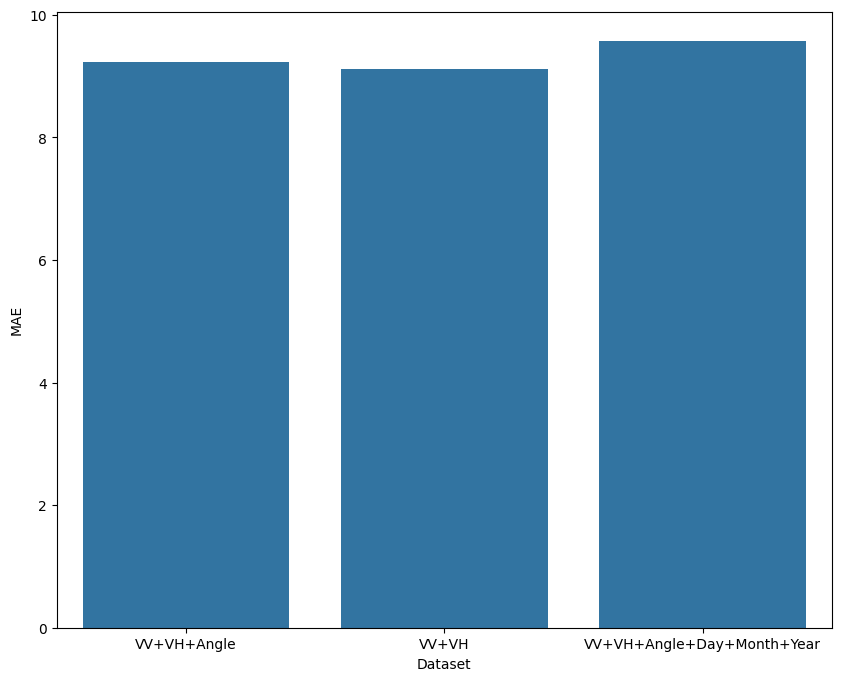

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

rf = sentinel_results[sentinel_results['Model'] == 'RandomForest']

plt.figure(figsize=(10, 8))
sns.barplot(rf, x='Dataset', y='MAE')

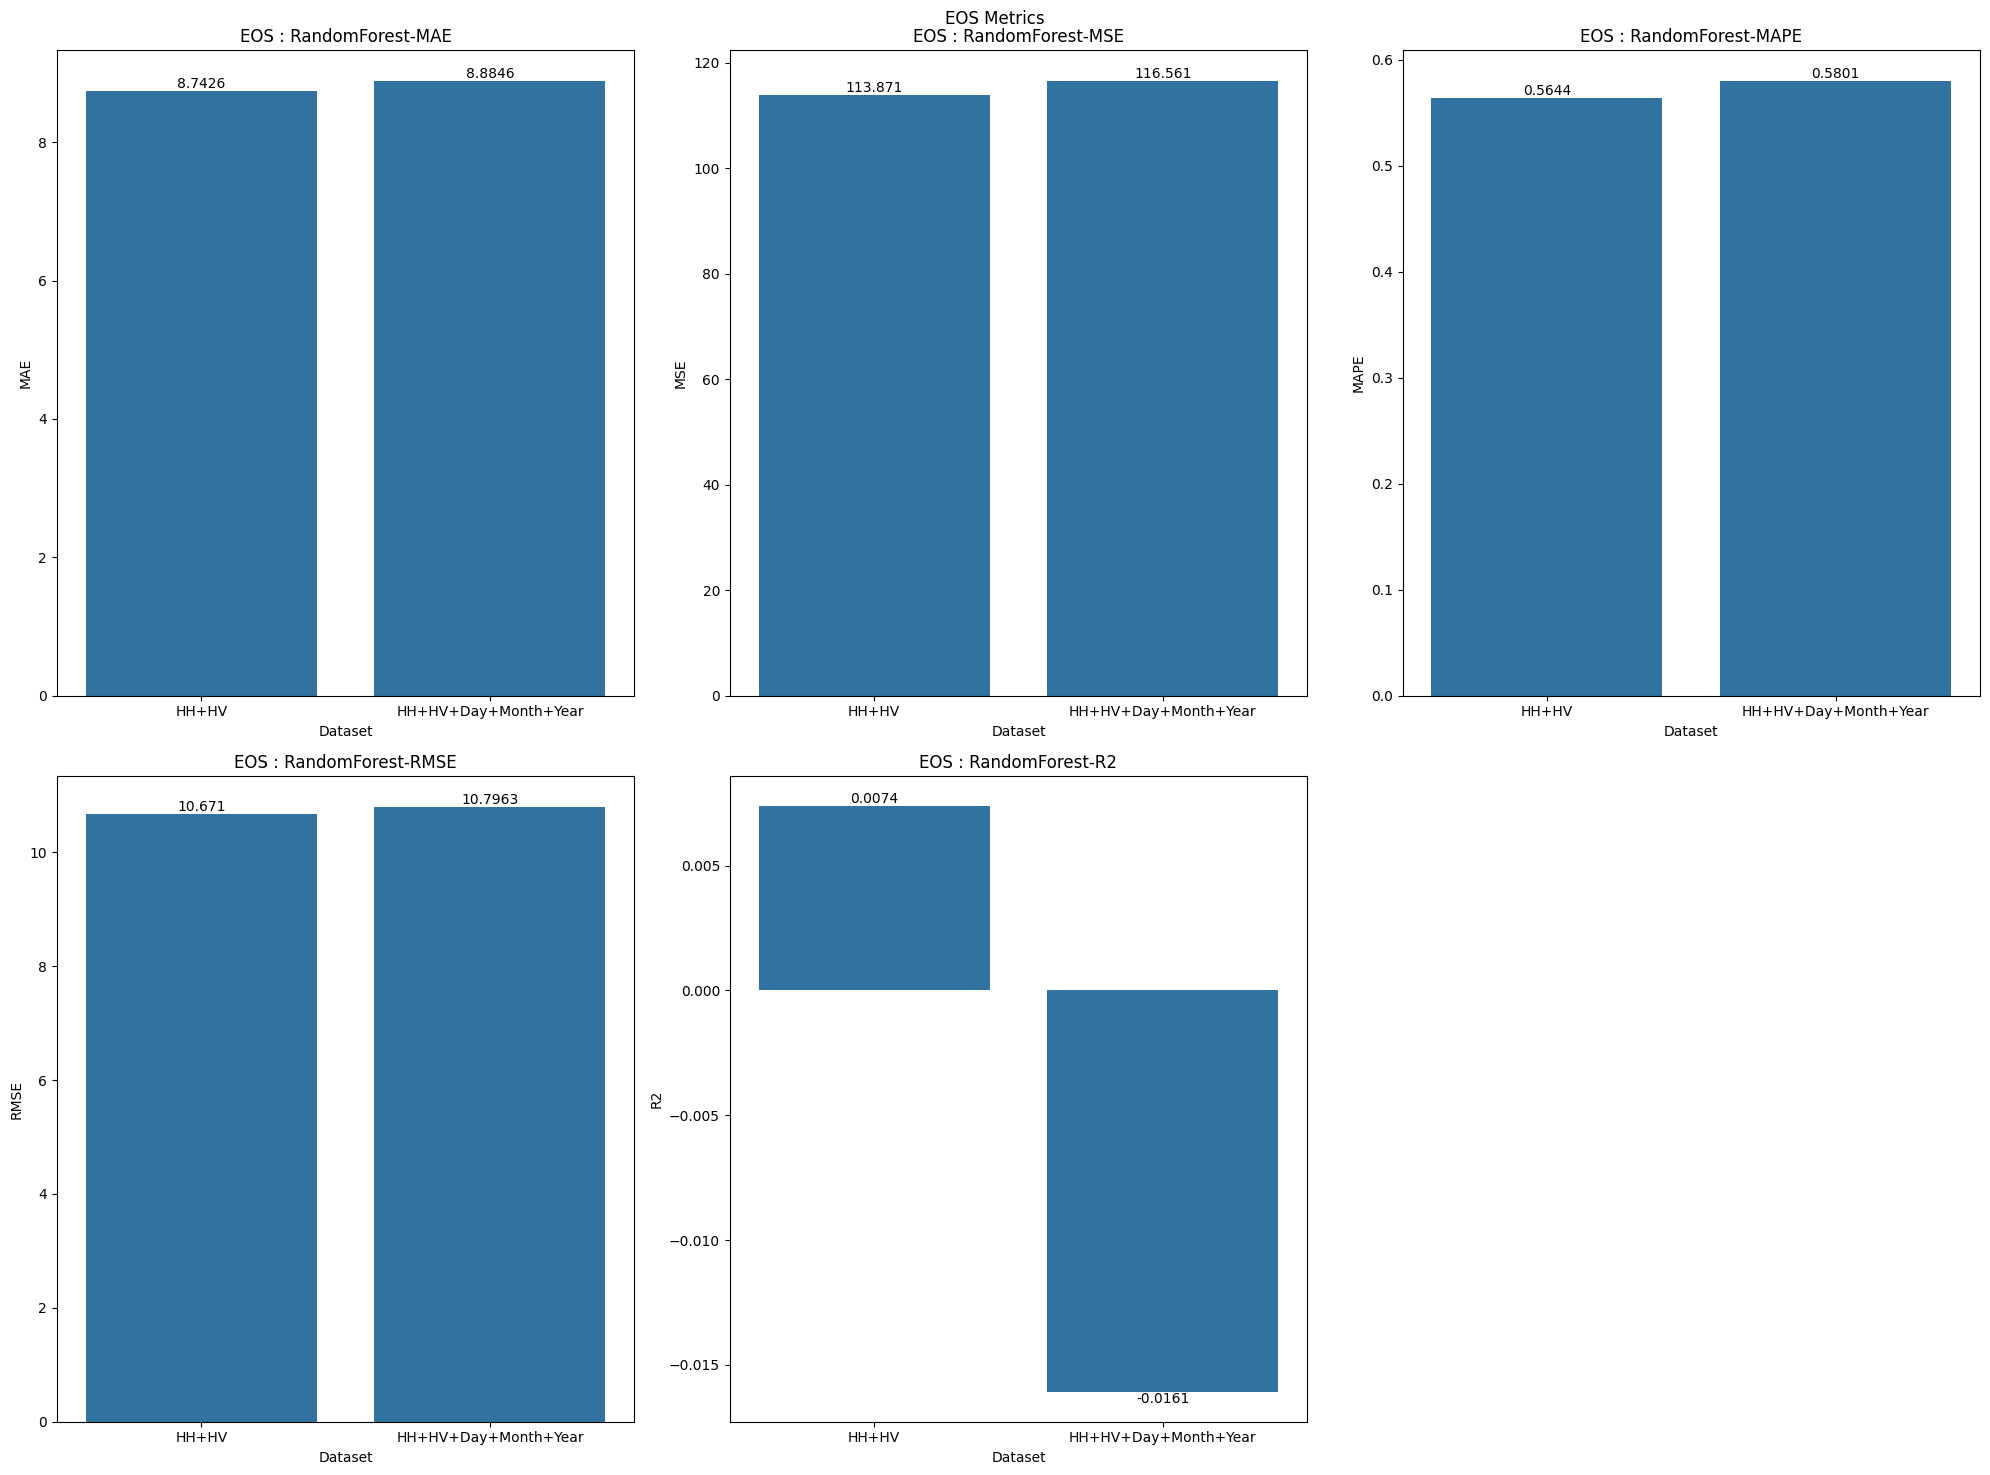

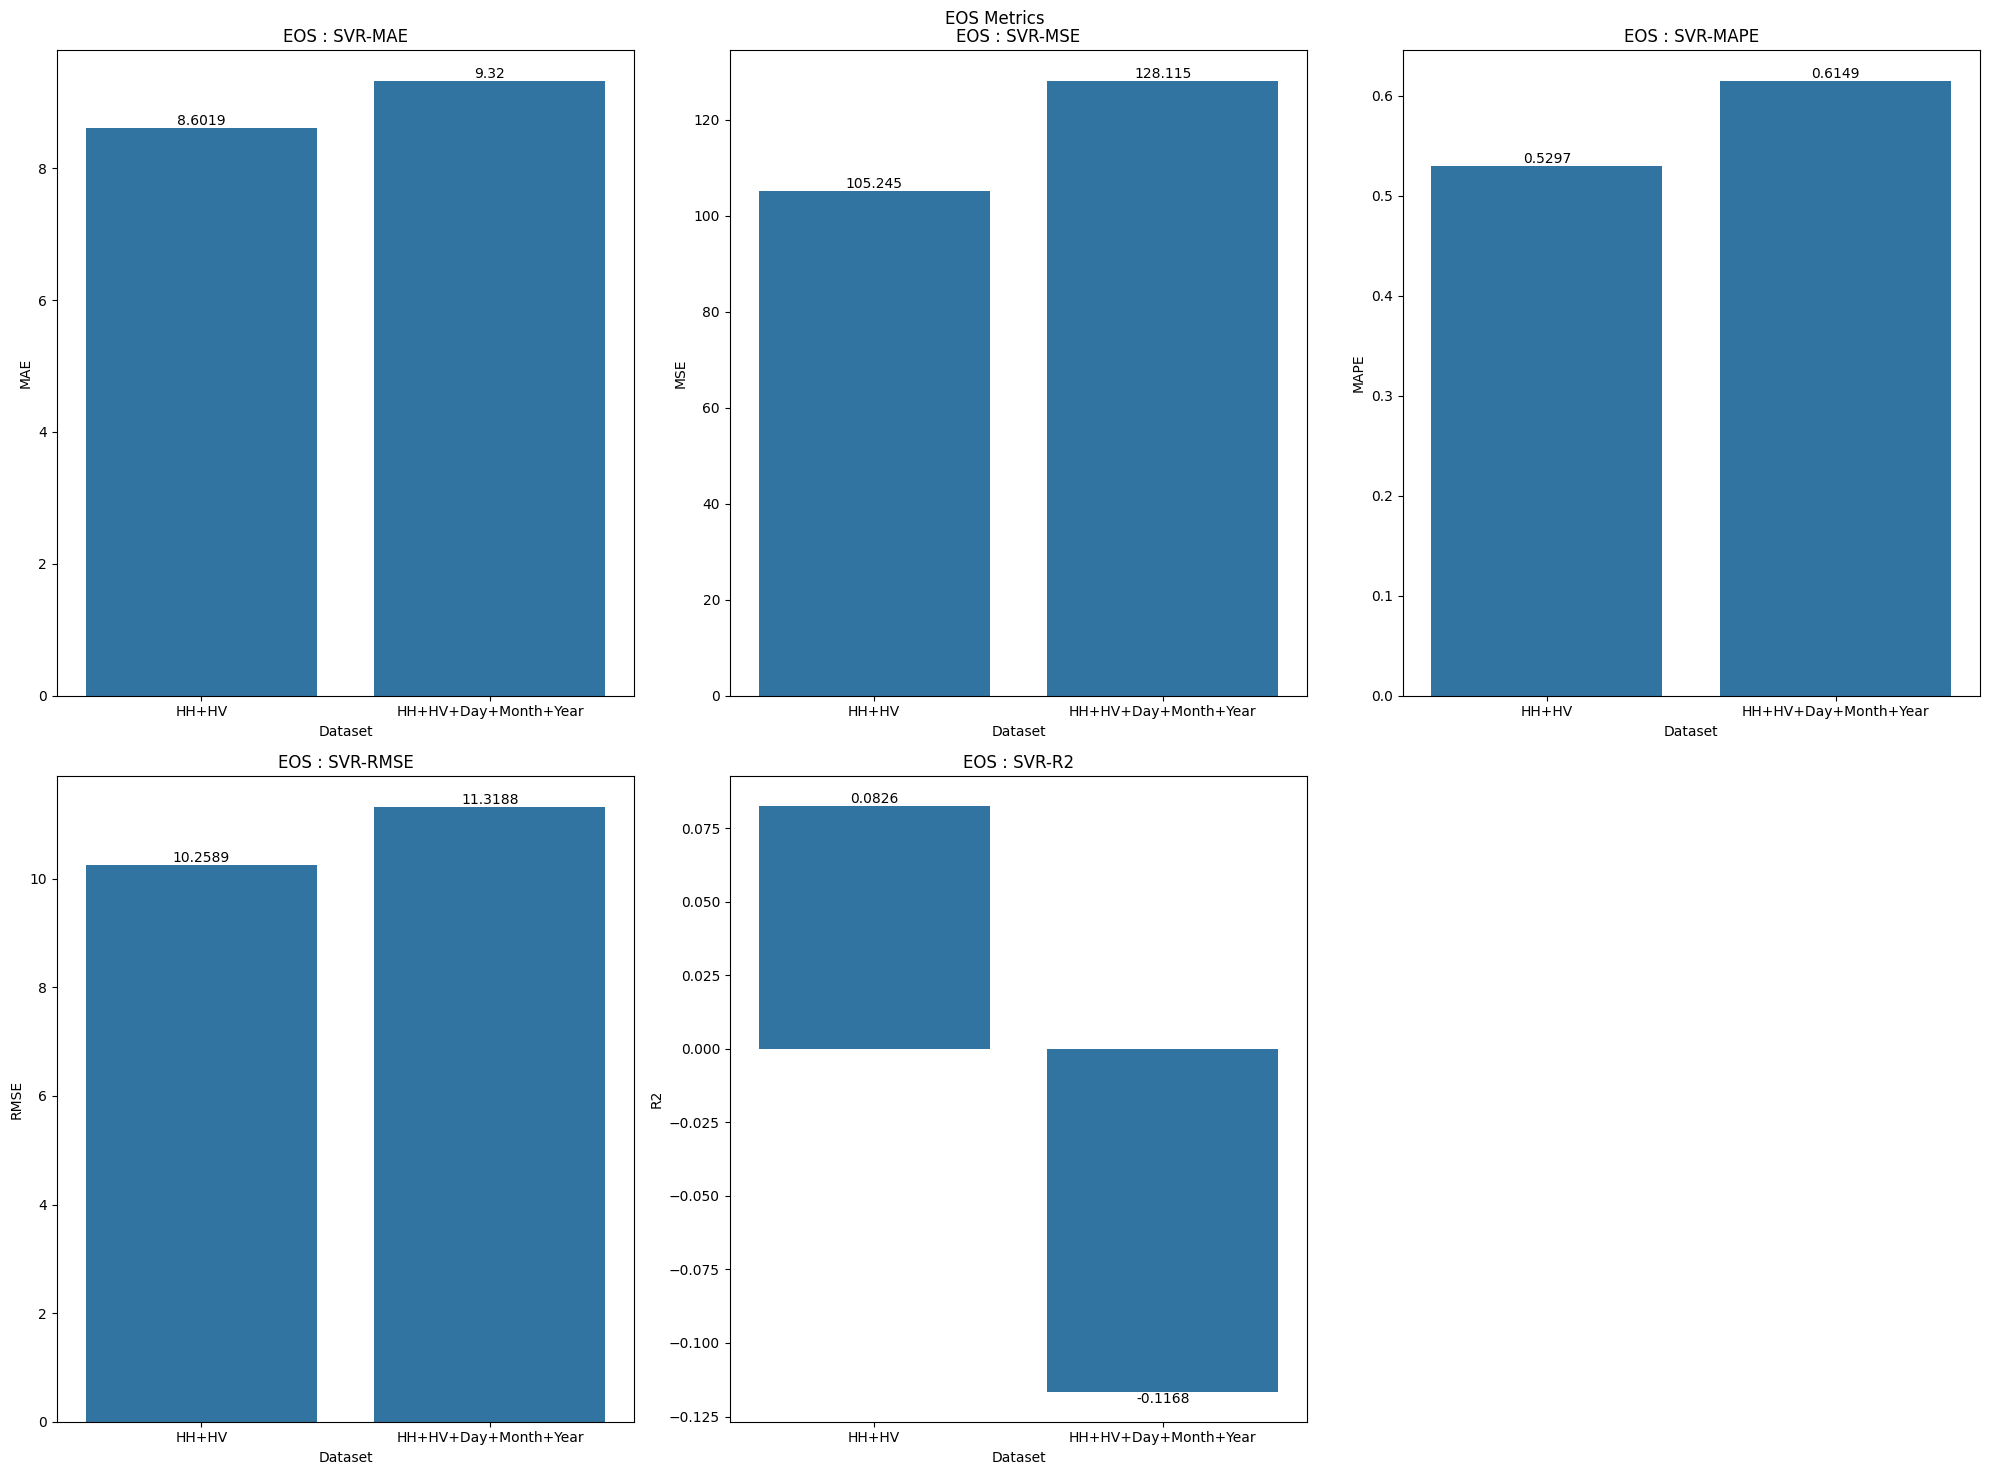

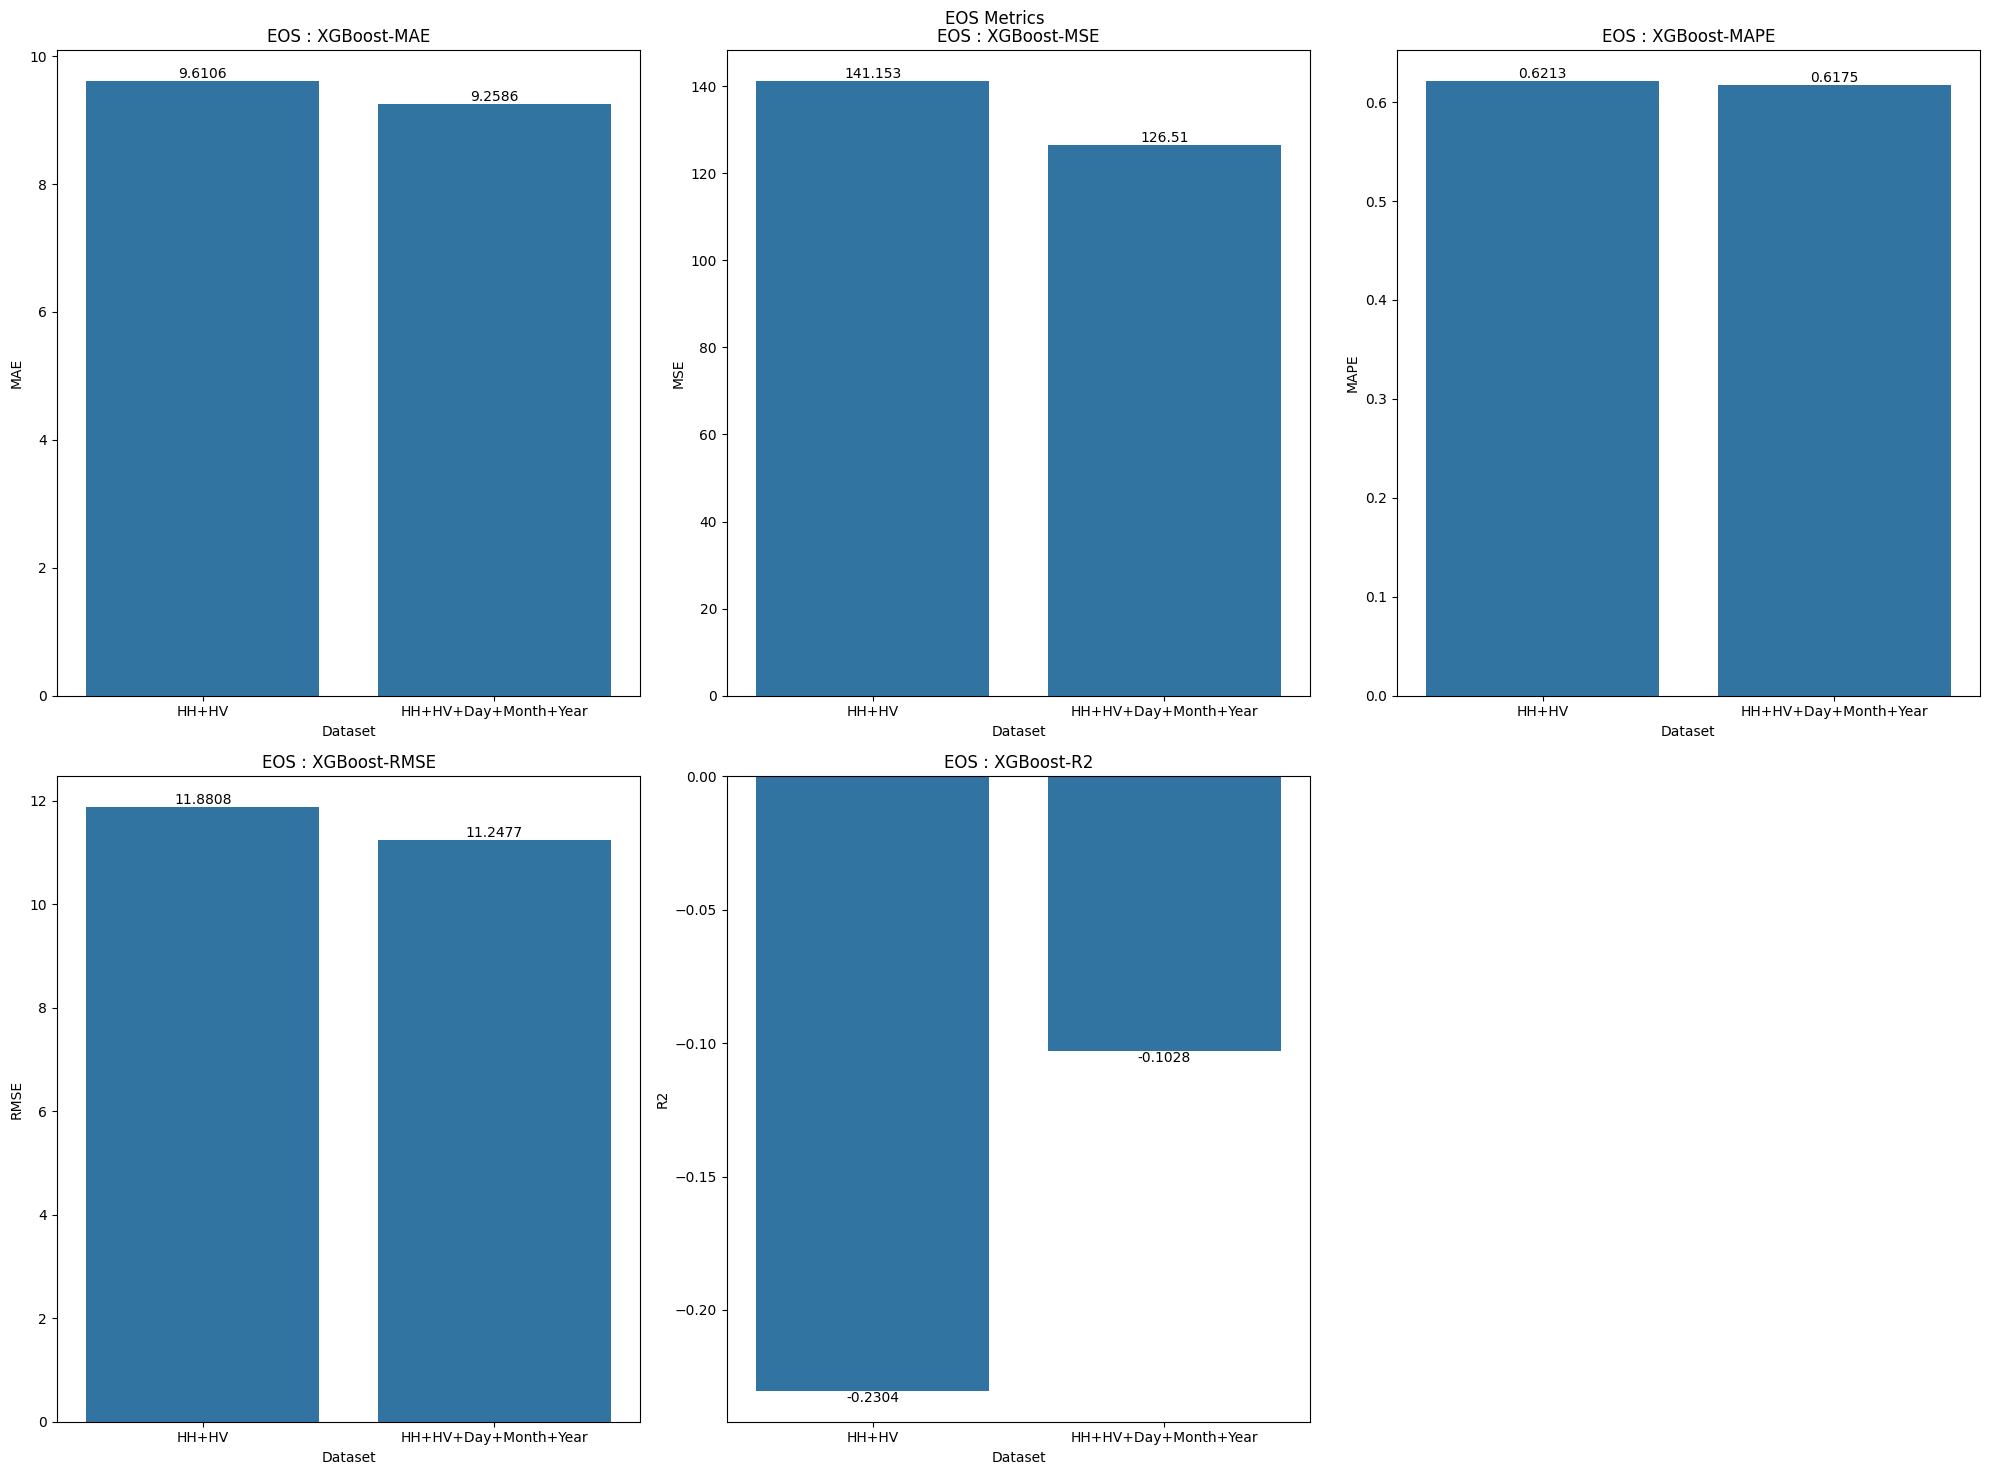

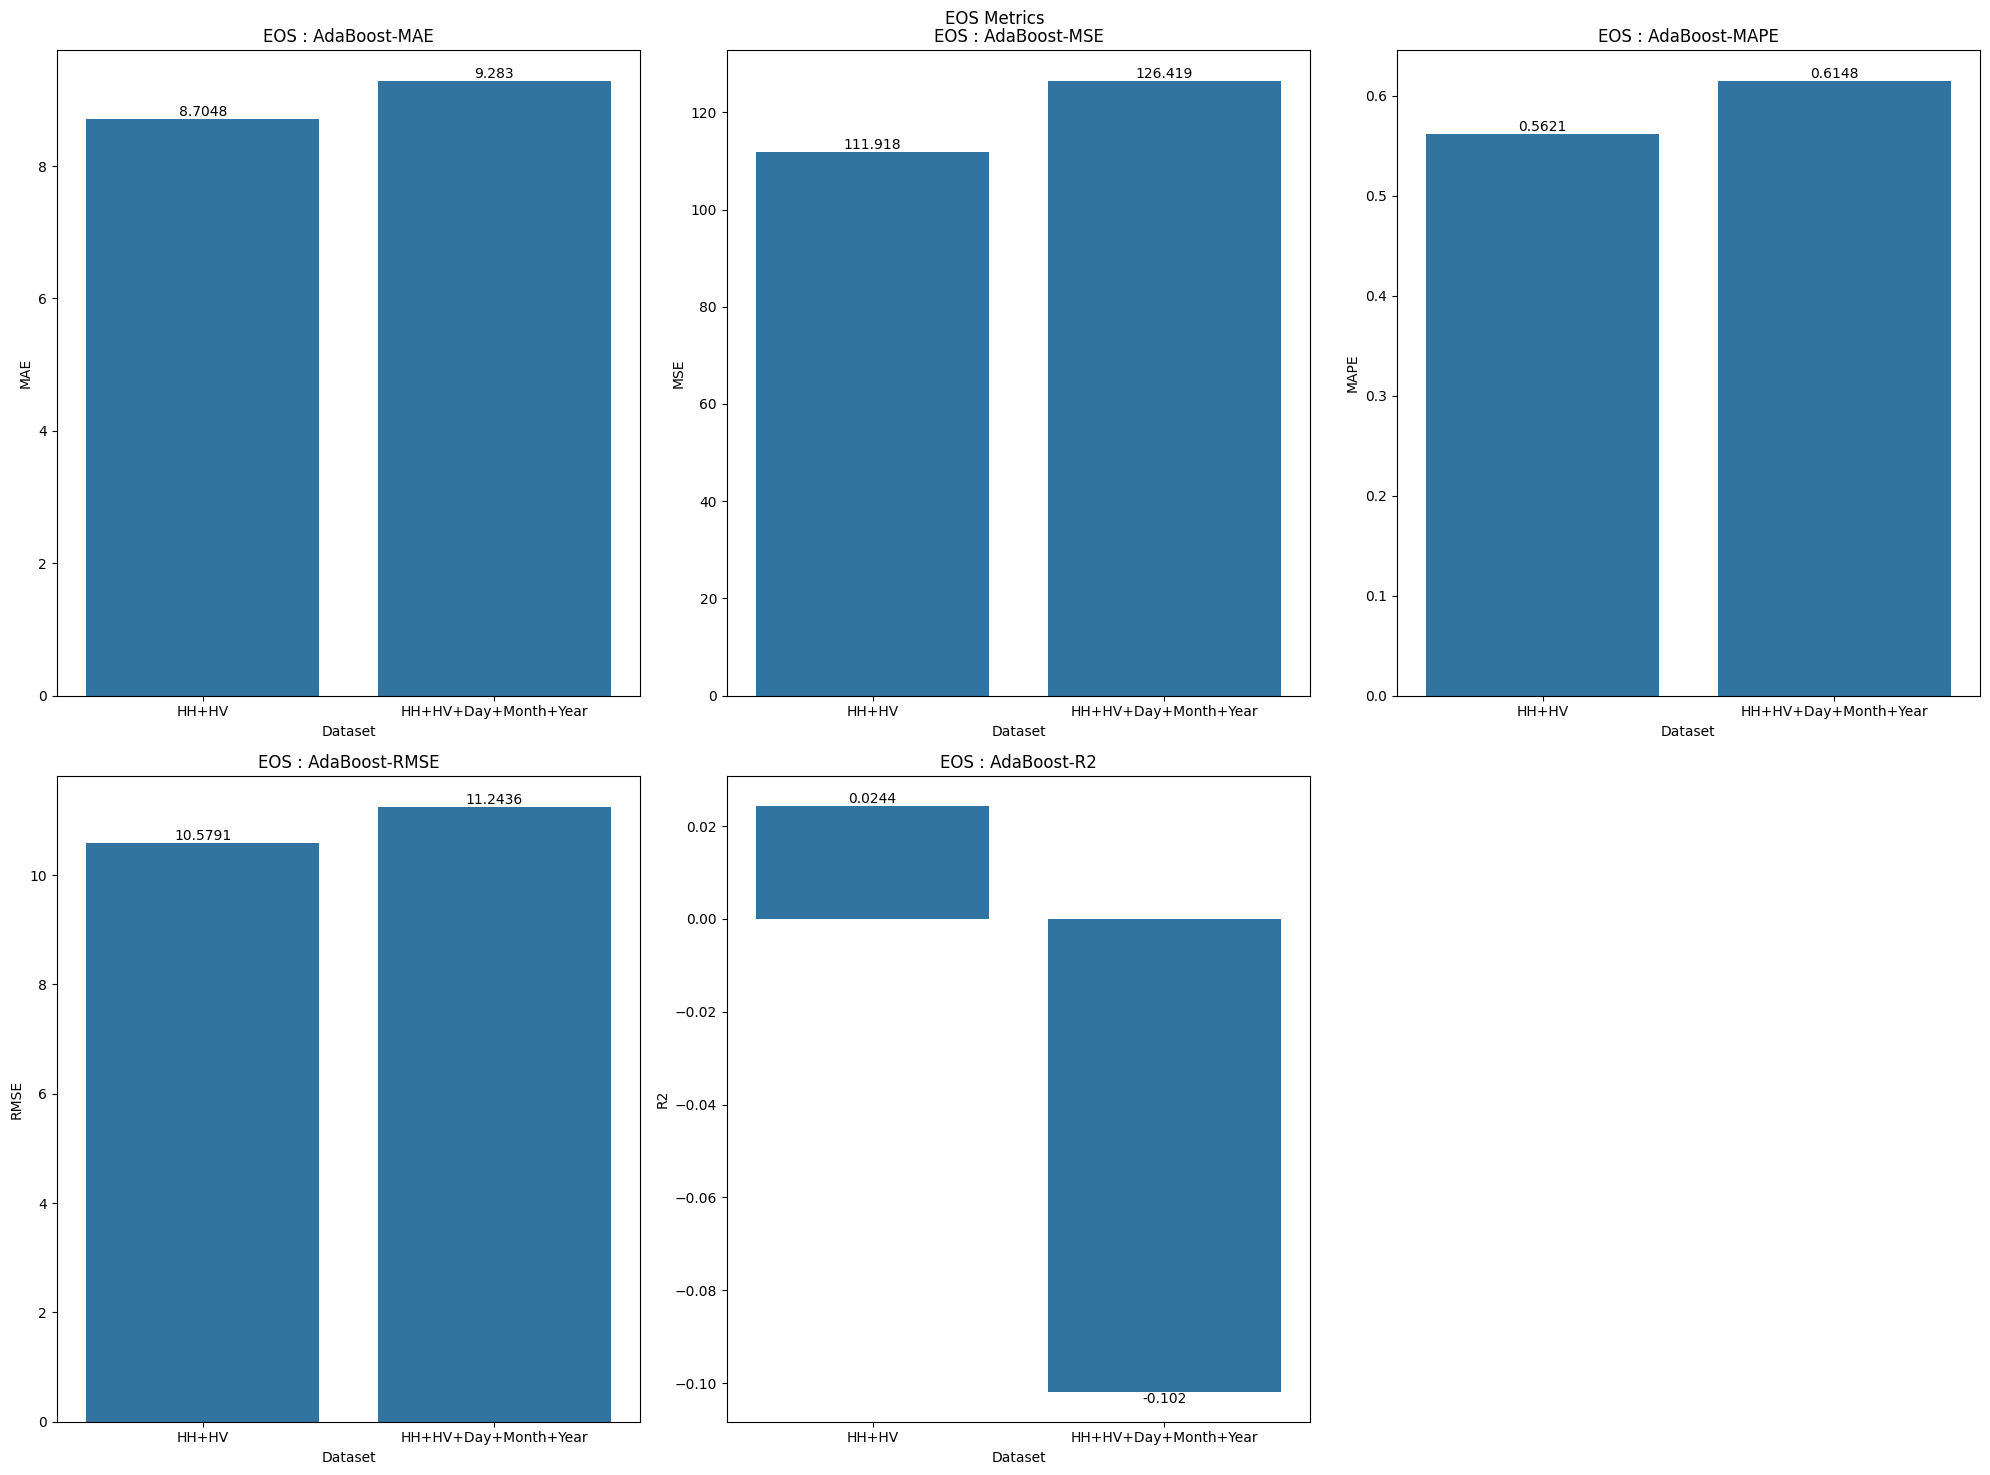

In [27]:
from pathlib import Path
import os
import matplotlib.pyplot as plt

OUTPUT_PATH = Path('/home/kshipra/work/major/ml experiments/output/plots')
metrics = ['MAE', 'MSE', 'MAPE', 'RMSE', 'R2']

def dataframe_to_plots(satellite_name):
    sat_results = result_df[result_df['Satellite'] == satellite_name]
    os.makedirs(OUTPUT_PATH / satellite_name, exist_ok=True)

    for model in set(sat_results['Model']):
        model_results = sat_results[sat_results['Model'] == model]
        plt.figure(figsize=(20, 15))
        plt.suptitle(f'{satellite_name} Metrics')
        for idx, metric in enumerate(metrics):
            plt.subplot(2, 3, idx+1)
            plt.title(f"{satellite_name} : {model}-{metric}")
            ax = sns.barplot(model_results, x='Dataset', y=metric)
            for container in ax.containers:
                ax.bar_label(container)
            plt.tight_layout()

        plt.savefig(OUTPUT_PATH / satellite_name / f"{model}-Metrics.png")


dataframe_to_plots("EOS")

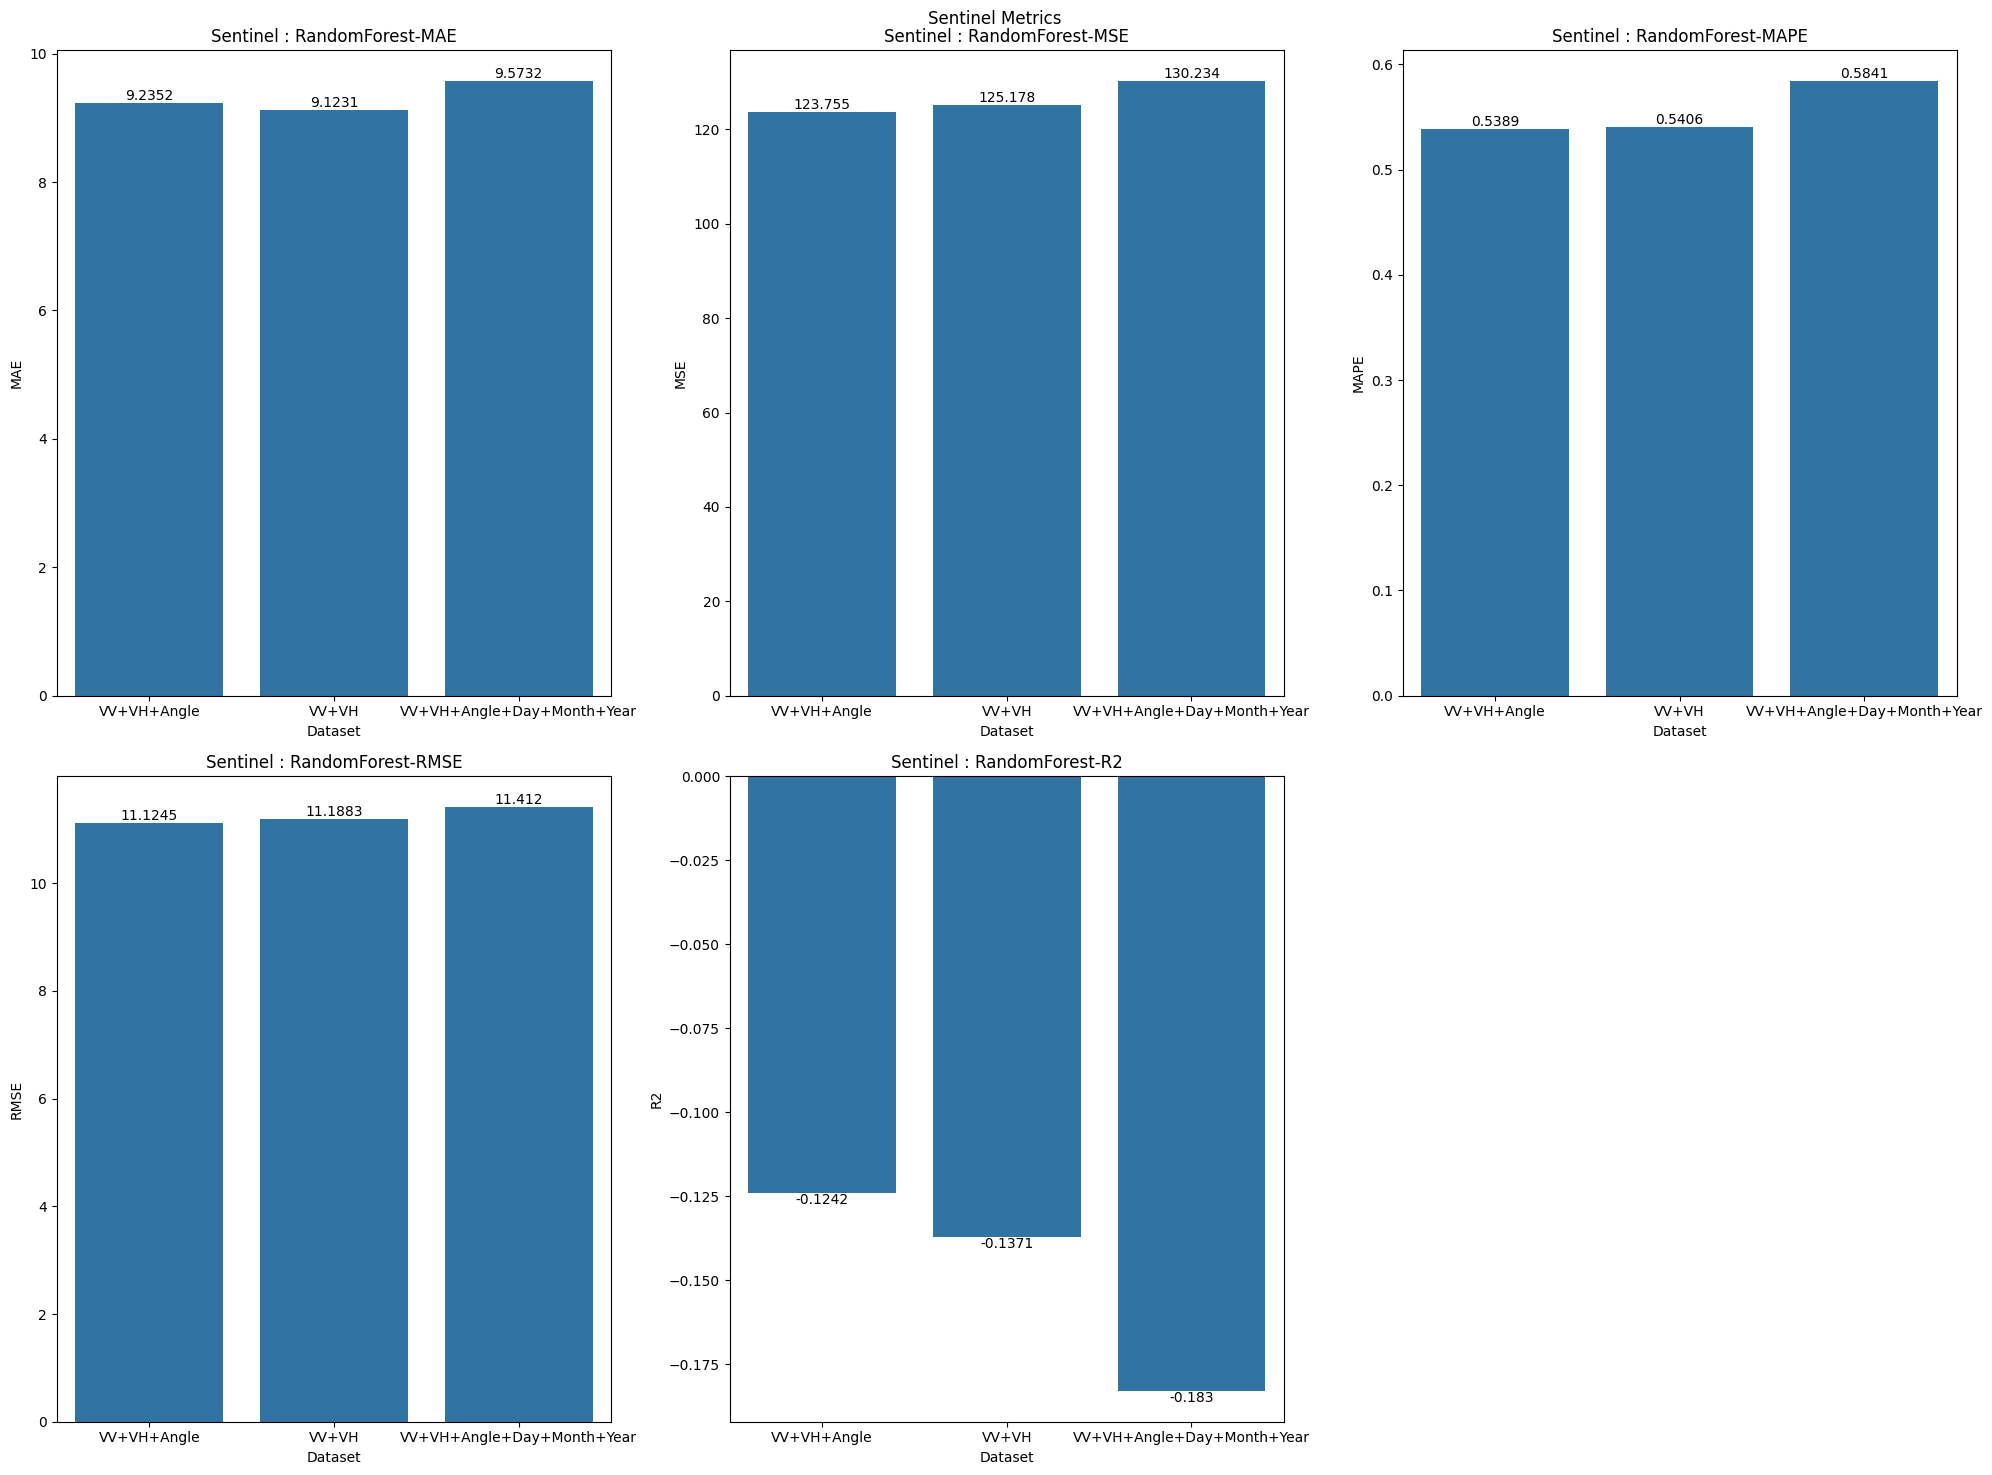

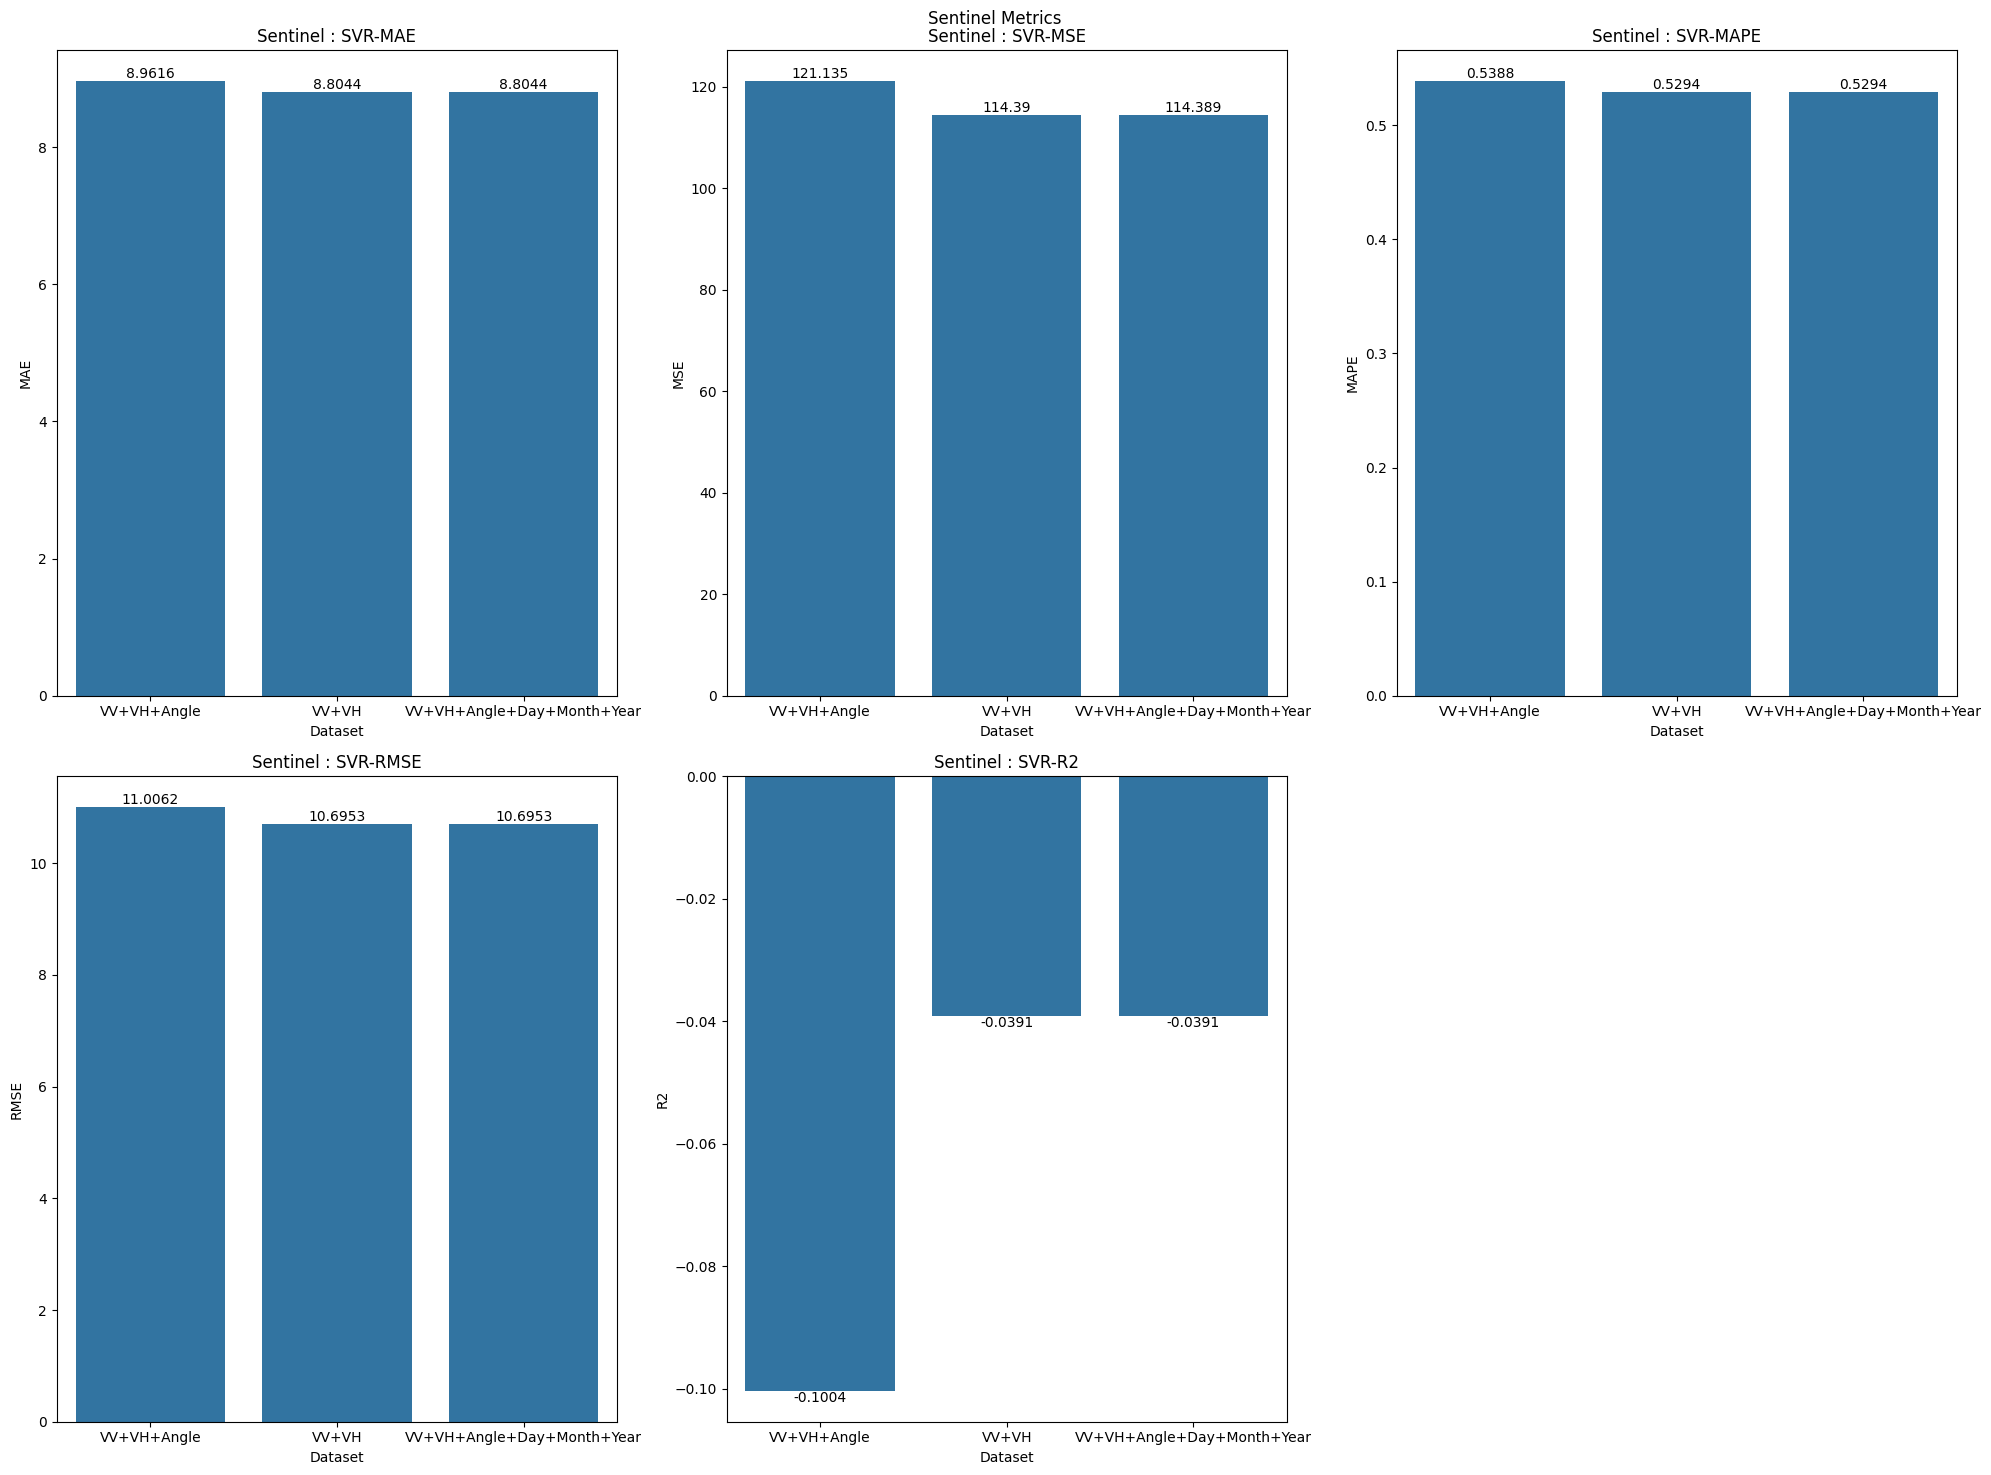

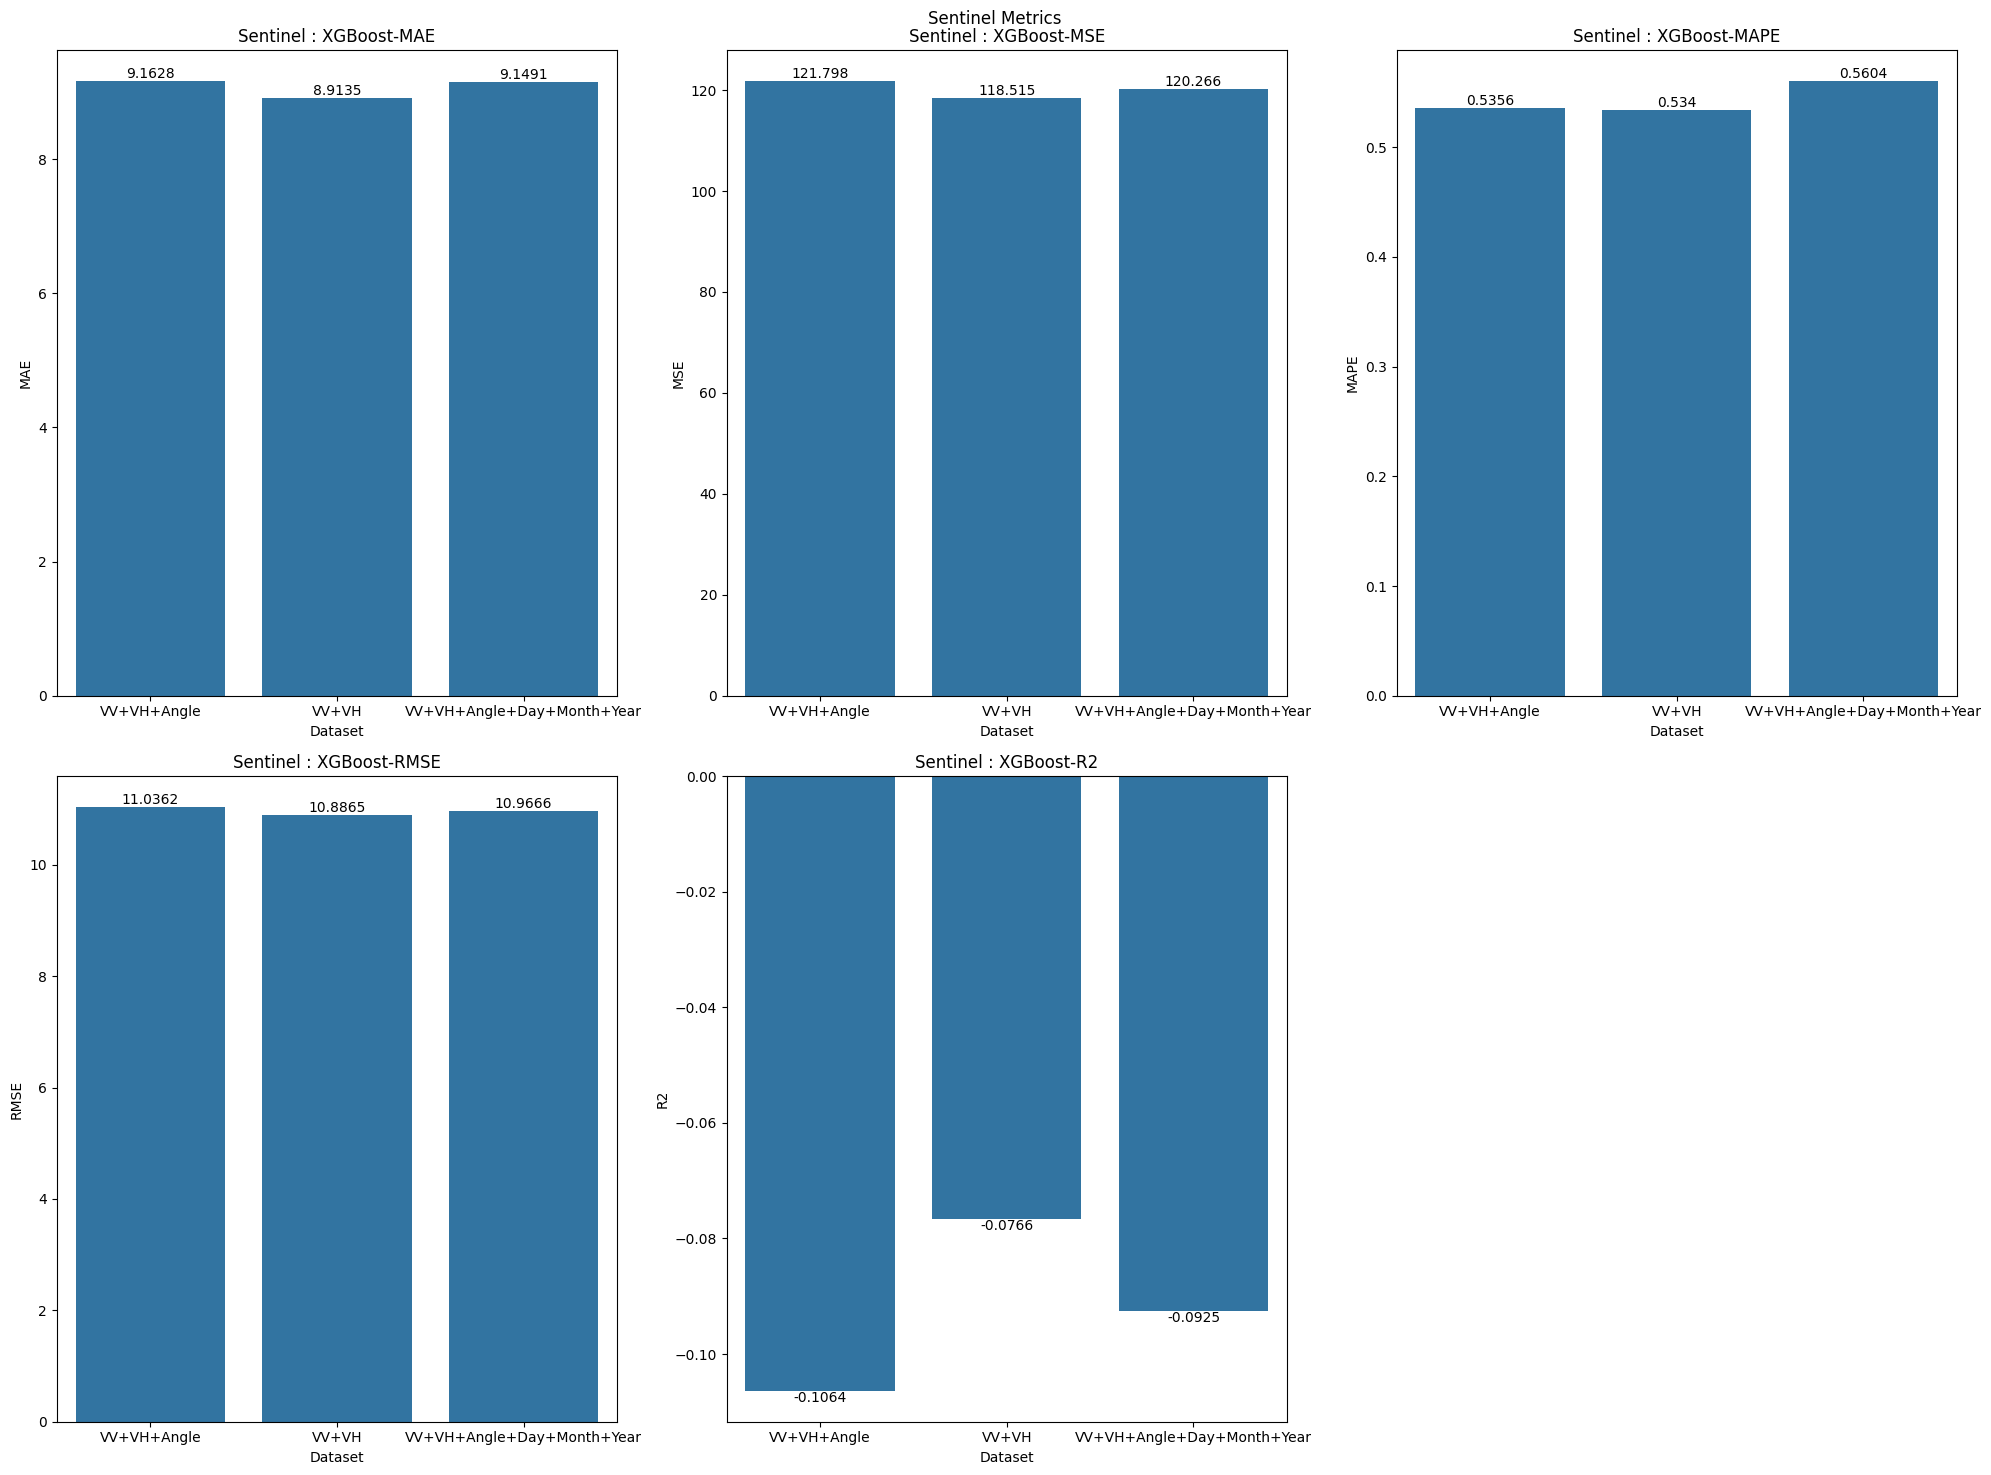

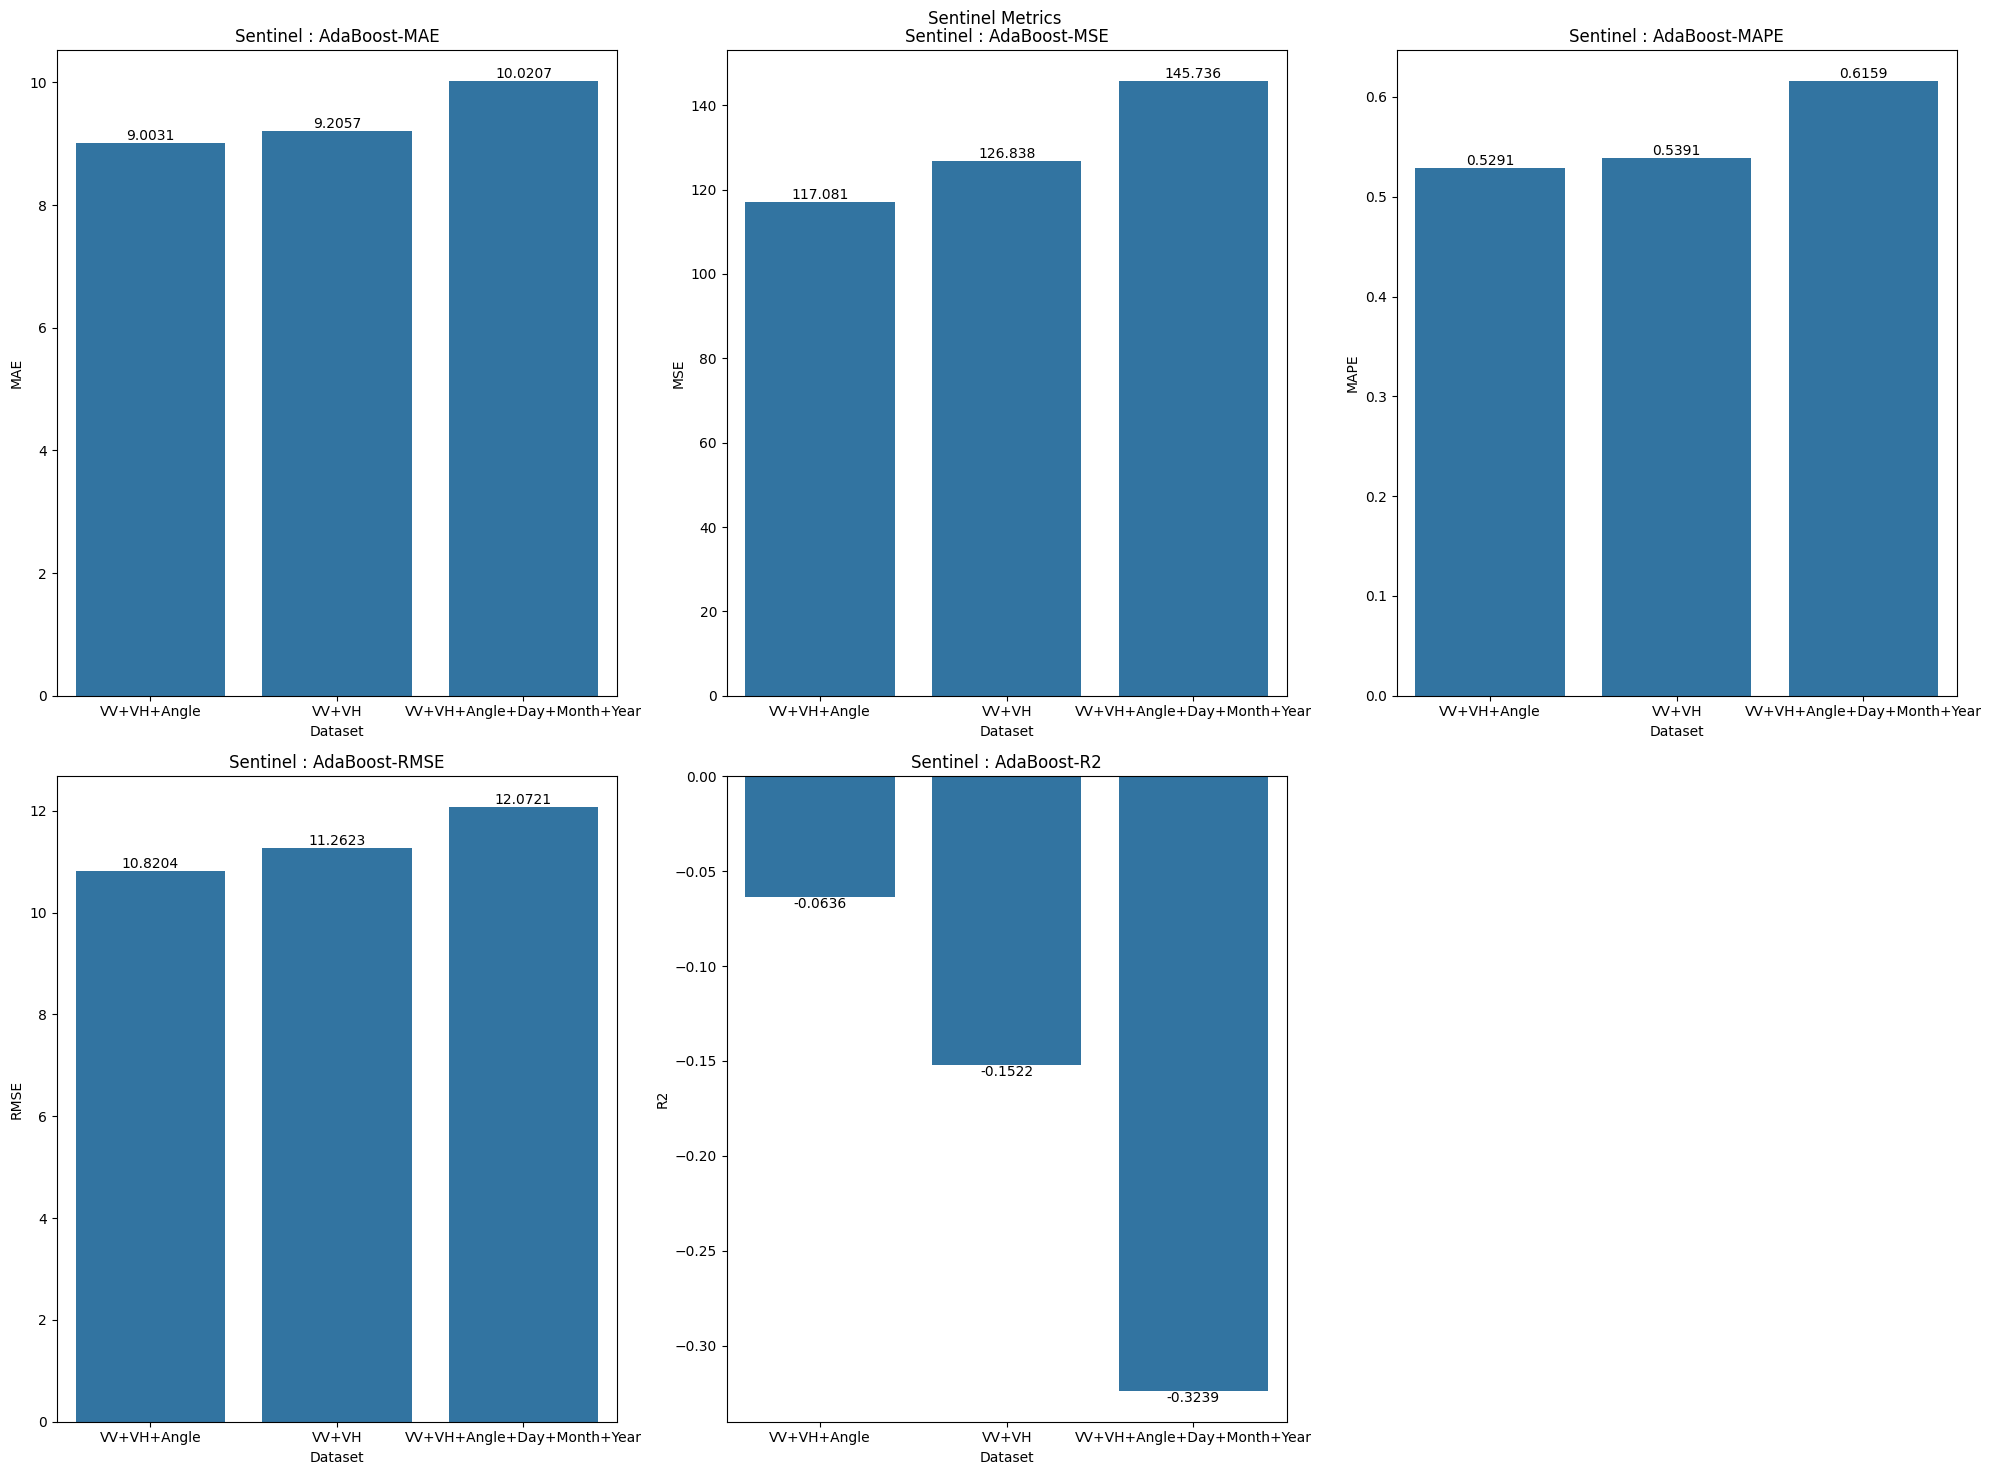

In [28]:
dataframe_to_plots("Sentinel")

# 3D Plots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

DATA_PATH = Path("/home/kshipra/work/major/ml experiments/data")


eos = pd.read_excel(DATA_PATH / "eos_processed.xlsx")
sentinel = pd.read_excel(DATA_PATH / "sentinel_processed.xlsx")

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def make_3d_plot(df, x_col, y_col, z_col, save_path):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Extract the data
    x = df[x_col]
    y = df[y_col] 
    z = df[z_col]

    # Create scatter plot with color gradient based on soil moisture
    scatter = ax.scatter(x, y, z, 
                        c=z,            # Color by soil moisture values
                        cmap='plasma',  # Different colormap
                        alpha=0.8,      # Slightly more opaque
                        s=60,           # Larger points
                        edgecolor='black',  # Black edges for better visibility
                        linewidth=0.5)

    # Labels and title with better formatting
    ax.set_xlabel(f'{x_col} (dB)', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_ylabel(f'{y_col} (dB)', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_zlabel('Soil Moisture SM1 (%)', fontsize=14, fontweight='bold', labelpad=15)
    ax.set_title(f'{x_col} vs {y_col} vs SM1 (%)', 
                fontsize=16, fontweight='bold', pad=20)

    # Colorbar with better styling
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('Soil Moisture (%)', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)

    # Set better viewing angle
    ax.view_init(elev=25, azim=45)  # Adjust for best view

    # Add grid with subtle styling
    ax.grid(True, alpha=0.2, linestyle='--')

    # Improve tick labels
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Add a background pane for better depth perception
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

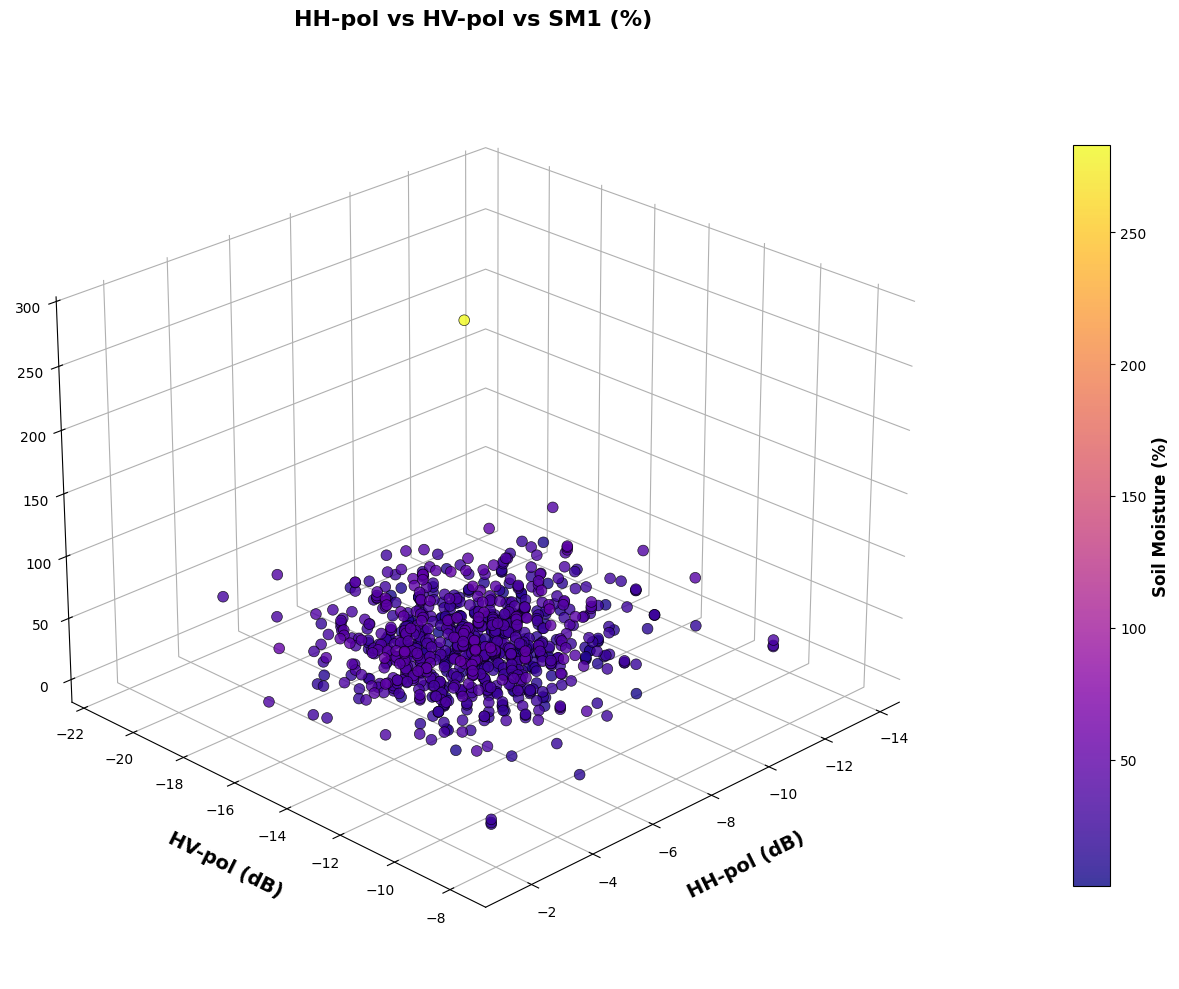

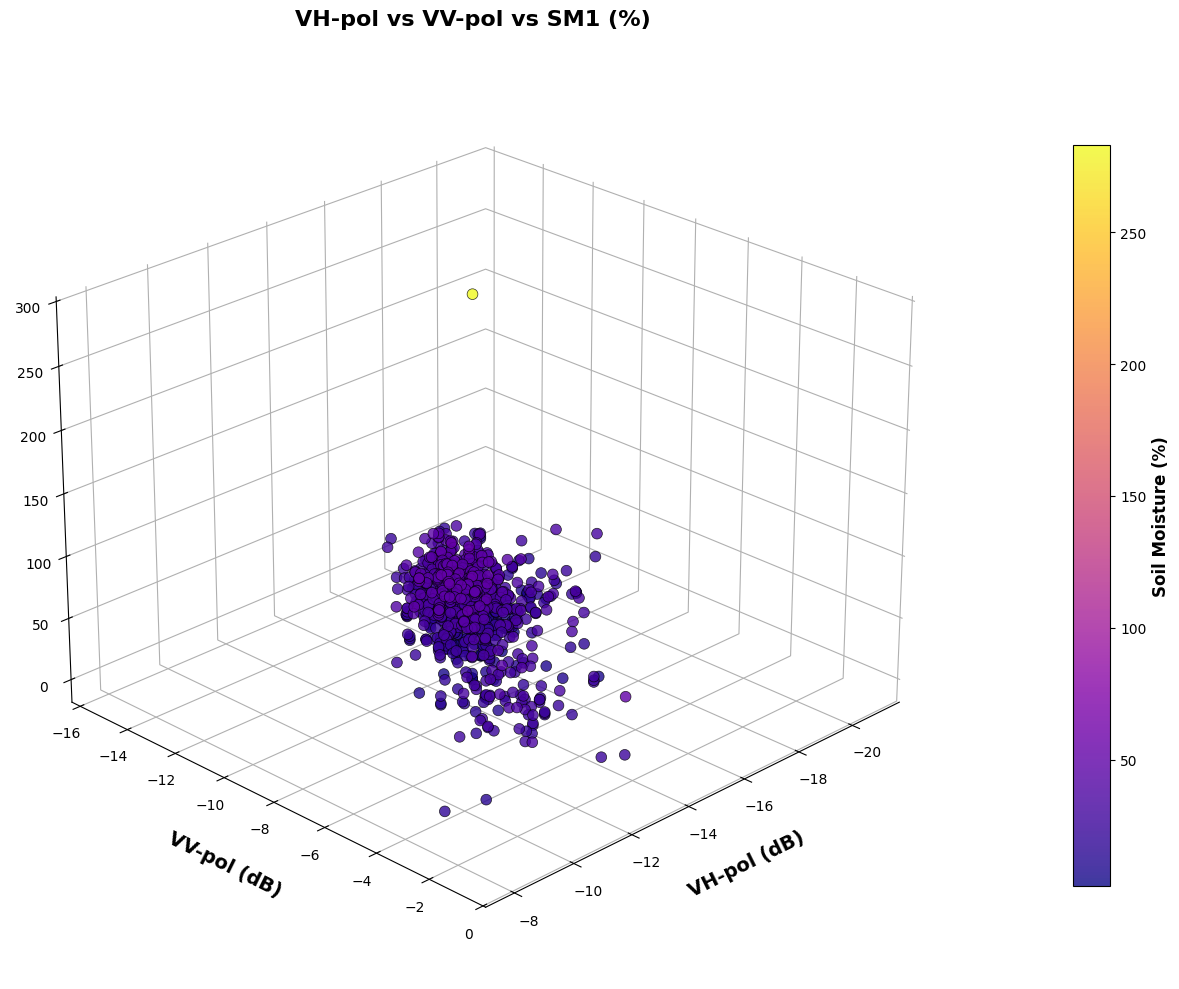

In [8]:
from pathlib import Path

make_3d_plot(eos, 'HH-pol', 'HV-pol', 'SM1 (%)', '/home/kshipra/work/major/ml experiments/output/plots/EOS/hh-hv-sm.png')
make_3d_plot(sentinel, 'VH-pol', 'VV-pol', 'SM1 (%)', '/home/kshipra/work/major/ml experiments/output/plots/Sentinel/vh-vv-sm.png')